# Hydrophone Request Demo
This notebook provides a demo for the basic functionality of the hydrophone_request module

First, let's import some dependencies:

In [1]:
import os
import sys

import datetime
import numpy as np
from obspy import read,Stream, Trace
from obspy.core import UTCDateTime

cwd = os.getcwd()
ooipy_dir = os.path.dirname(os.path.dirname(cwd))
sys.path.append(ooipy_dir)
from ooipy.request import hydrophone_request
from matplotlib import pyplot as plt

# Some magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Now let's request some broadband hydrophone data from OOI

In [2]:
start_time = datetime.datetime(2017,3,10,0,0,0)
end_time = datetime.datetime(2017,3,10,0,5,0)
node = 'PC01A'


print('Getting Hydrophone Data from OOI: \n')
hydrophone_data = hydrophone_request.get_acoustic_data(start_time, end_time, node, verbose=True)

Getting Hydrophone Data from OOI: 

Fetching URLs...
Sorting valid URLs for Time Window...


### Returned Data Type:
hydrophone_data is a HydrophoneData object. This object is an exanded version of the Obspy data trace. More information about Obspy Traces can be found at https://docs.obspy.org/packages/autogen/obspy.core.trace.Trace.html

In [3]:
print(f'Returned Data Type: {type(hydrophone_data)}')

Returned Data Type: <class 'ooipy.hydrophone.basic.HydrophoneData'>


### Accessing Data

In [5]:
print('Hydrophone Data:\n\n')
print(hydrophone_data.data)

Hydrophone Data:


[-23690.         -24674.         -23582.         ..., -23480.63076923
 -23470.75384615 -23460.87692308]


### Accessing Data Stats

In [6]:
print('Hydrophone Data Stats:\n\n')
print(hydrophone_data.stats)

Hydrophone Data Stats:


         network: OO
         station: HYVM2
        location: PC01A
         channel: YDH
       starttime: 2017-03-09T23:59:59.999999Z
         endtime: 2017-03-10T00:04:59.999999Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 19200001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 9217, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 37752832})
      processing: ['ObsPy 1.2.1: trim(endtime=UTCDateTime(2017, 3, 10, 0, 5)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2017, 3, 10, 0, 0))']


### Compute Spectrogram and PSD

In [7]:
hydrophone_data.compute_spectrogram(avg_time=1)
hydrophone_data.compute_psd_welch()

### Visualize Spectrogram and PSD

In [14]:
hydrophone_data.spectrogram.spectrogram

AttributeError: 'Spectrogram' object has no attribute 'spectrogram'

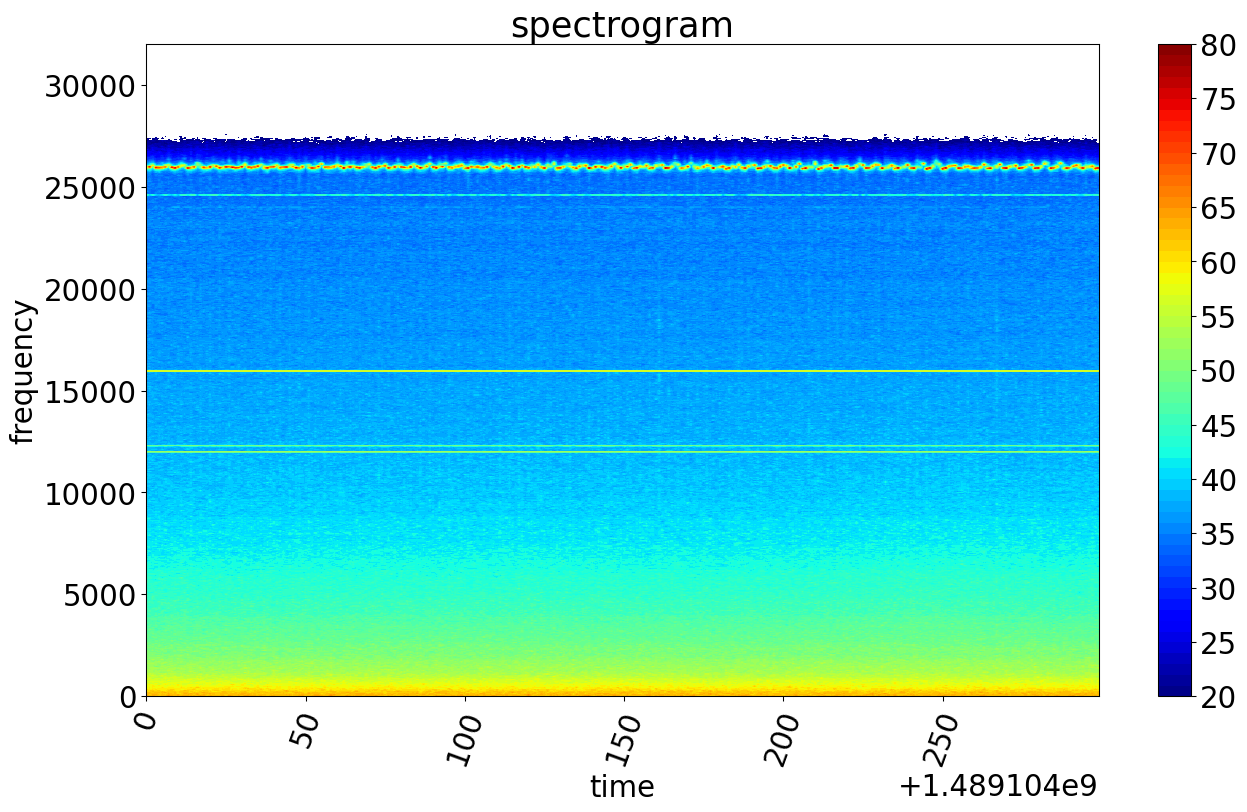

/Users/John/University-of-Washington/Ocean_Acoustics/Code/ooipy/ooipy/hydrophone/basic.py:610: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([fmin, fmax])


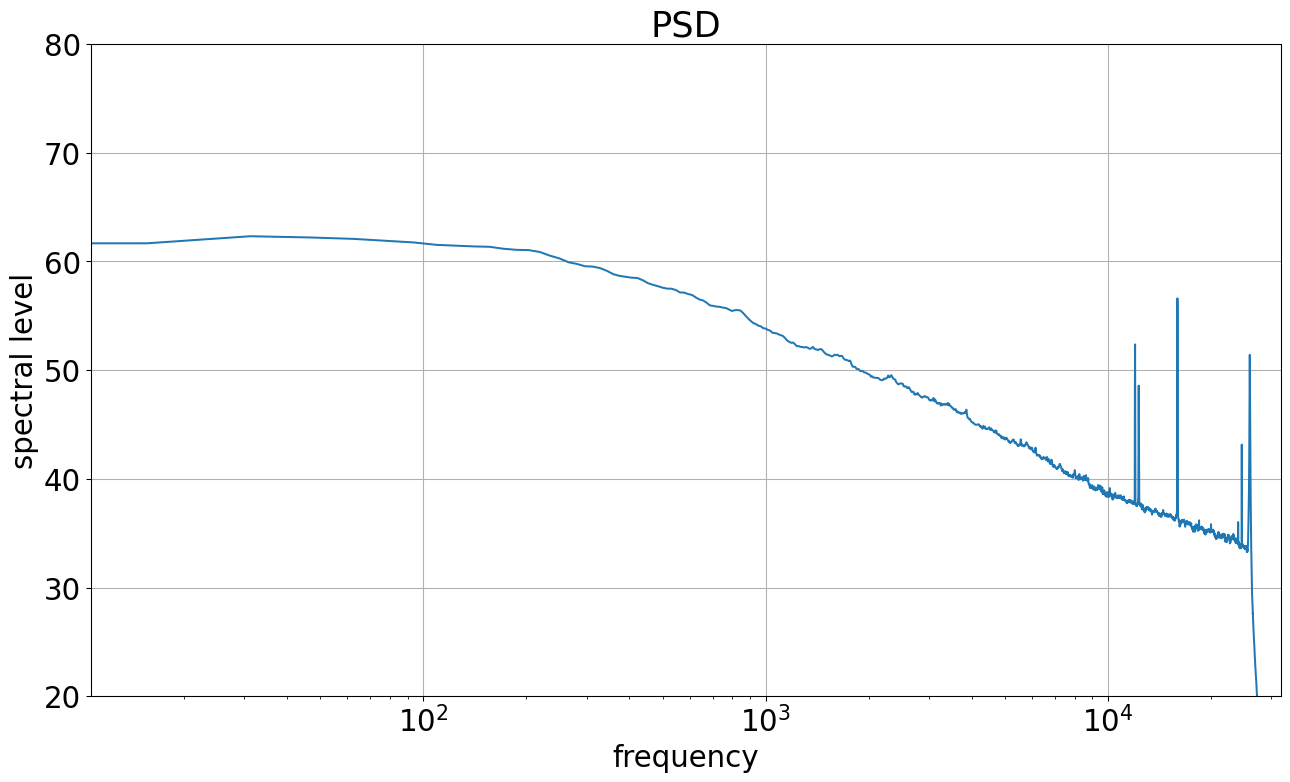

In [11]:
hydrophone_data.spectrogram.visualize(res_reduction_time=1, fmax=32000)
hydrophone_data.psd.visualize(fmax=32000)

### Compute Spectrogram and PSD Using Multiprocessing

In [8]:
hydrophone_data.compute_spectrogram_mp(n_process=3, avg_time=1.0)
hydrophone_data.compute_psd_welch_mp(split=150, n_process=3)

### Visualize Spectrogram and PSD Calculated wtih MP

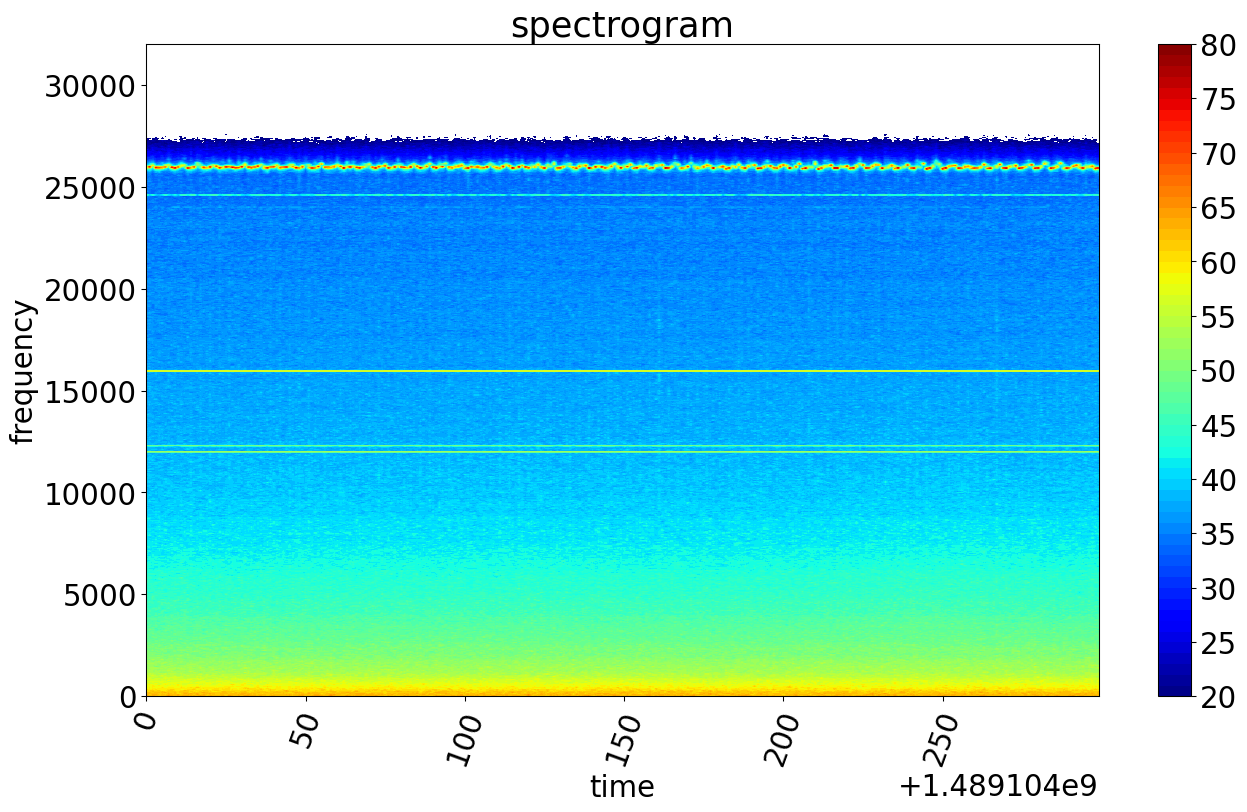

In [9]:
hydrophone_data.spectrogram.visualize(fmax=32000)

/Users/John/University-of-Washington/Ocean_Acoustics/Code/ooipy/ooipy/hydrophone/basic.py:610: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([fmin, fmax])


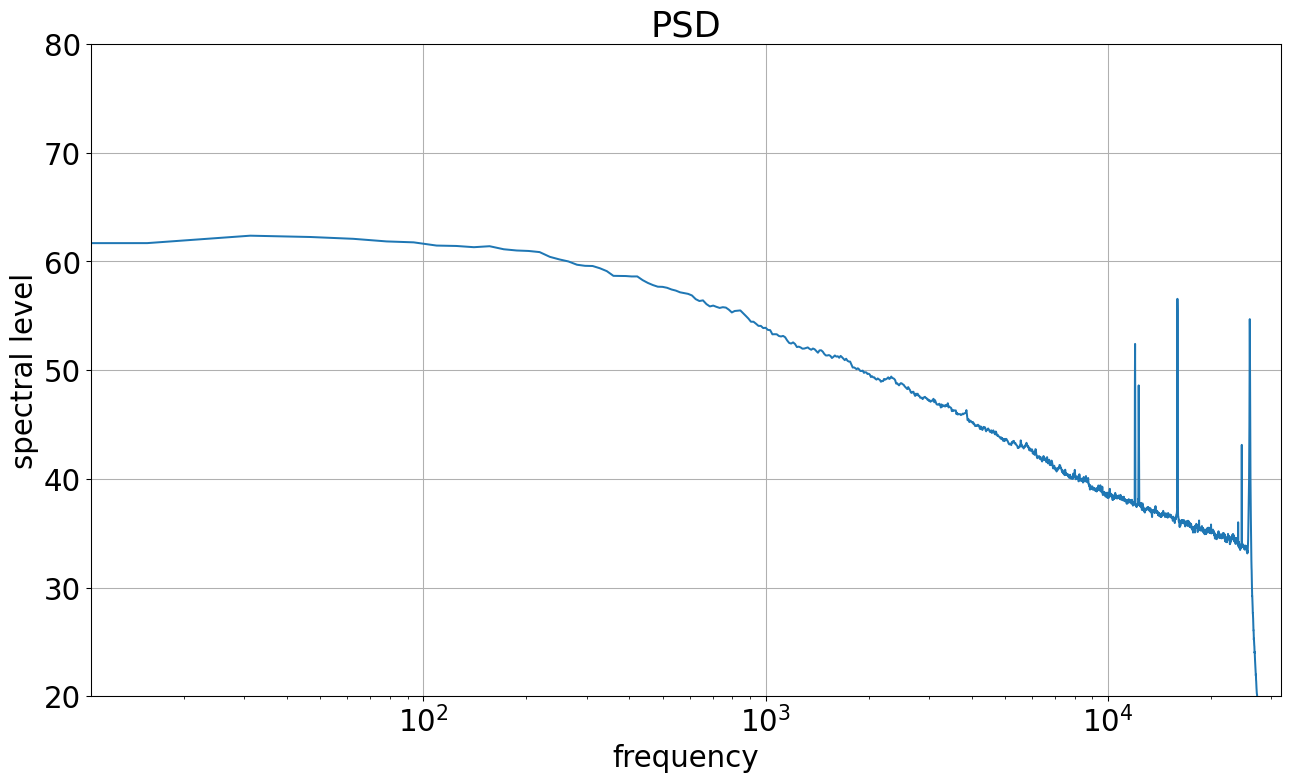

/Users/John/University-of-Washington/Ocean_Acoustics/Code/ooipy/ooipy/hydrophone/basic.py:610: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([fmin, fmax])


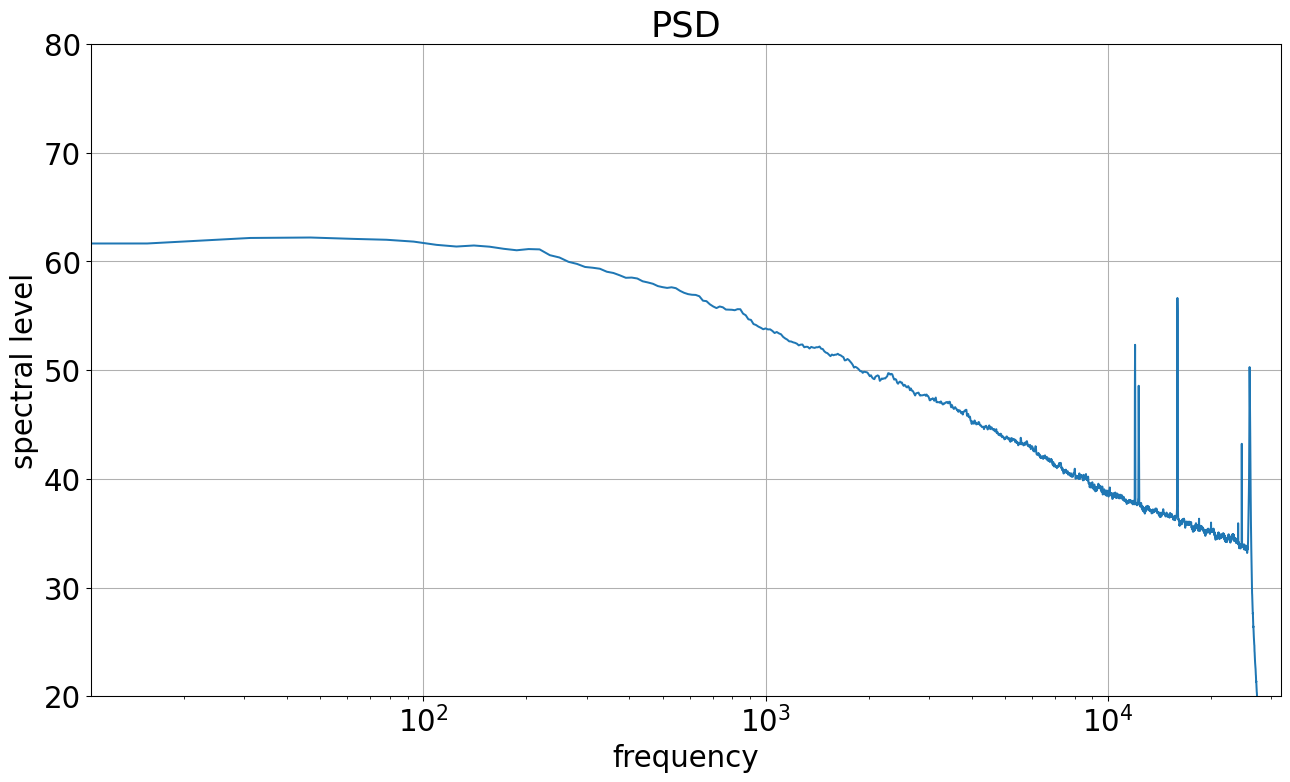

In [10]:
for psd in hydrophone_data.psd_list:
    psd.visualize(fmax=32000)

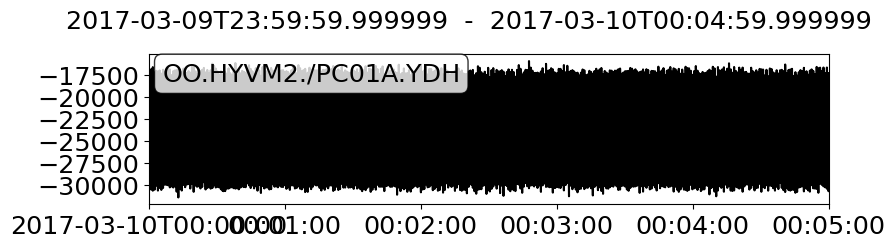

In [11]:
p1 = hydrophone_data.plot()

## Low Frequency Hydrophone Data Request

In [4]:
starttime = datetime.datetime(2017,3,10,7,0,0)
endtime = datetime.datetime(2017,3,10,7,1,30)
location = 'Axial_Base'
fmin = None
fmax = None

# Returns ooipy.ooipy.hydrophone.base.HydrophoneData Object
data_trace = hydrophone_request.get_acoustic_data_LF(starttime, endtime, location, fmin, fmax, zero_mean=True)

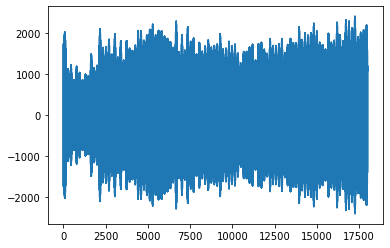

In [5]:
plt.plot(data_trace.data)


## Testing Universal Read Function: ooipy_read

In [103]:
device1 = 'broadband_hydrophone'
device2 = 'low_frequency_hydrophone'
location1 = 'PC01A'
location2 = 'Eastern_Caldera'
starttime = datetime.datetime(2017,3,10,0,0,5)
endtime = datetime.datetime(2017,3,10,0,0,6)
fmin = 20
fmax = 40
verbose = True
data_gap_mode = 0

print('Broad Band Hydrophone:')
hydrophone_data_broadband = hydrophone_request.ooipy_read(device1, location1, starttime, endtime, fmin, fmax, verbose, data_gap_mode)

print('\n')
print('Low Frequency Hydrophone:')
hydrophone_data_lf = hydrophone_request.ooipy_read(device2, location2, starttime, endtime, fmin, fmax, verbose, data_gap_mode)


Broad Band Hydrophone:
Fetching URLs...
Sorting valid URLs for Time Window...
Signal Filtered


Low Frequency Hydrophone:


         network: OO
         station: HYVM2
        location: PC01A
         channel: YDH
       starttime: 2017-03-10T00:00:04.999999Z
         endtime: 2017-03-10T00:00:05.999999Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 64001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 9217, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 37752832})
      processing: ['ObsPy 1.2.1: trim(endtime=UTCDateTime(2017, 3, 10, 0, 0, 6)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2017, 3, 10, 0, 0, 5))', "ObsPy 1.2.1: filter(options={'freqmin': 20, 'freqmax': 40}::type='bandpass')"]


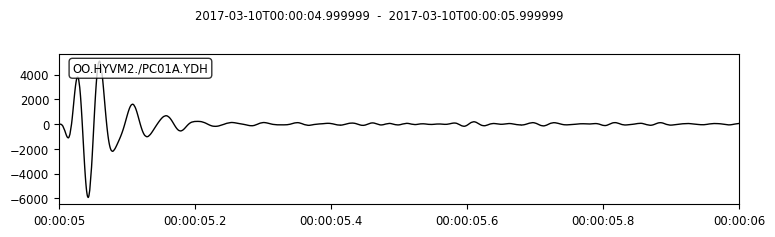

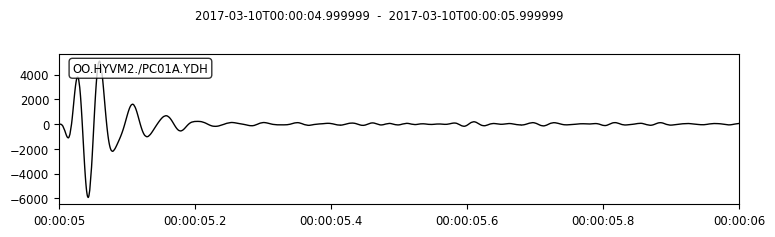

In [105]:
print(hydrophone_data_broadband.stats)
hydrophone_data_broadband.plot()

         network: OO
         station: AXEC2
        location: Eastern_Caldera
         channel: HHE
       starttime: 2017-03-10T00:00:05.000000Z
         endtime: 2017-03-10T00:00:06.000000Z
   sampling_rate: 200.0
           delta: 0.005
            npts: 201
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 1, 'encoding': 'FLOAT32', 'byteorder': '>', 'record_length': 4096, 'filesize': 4096})


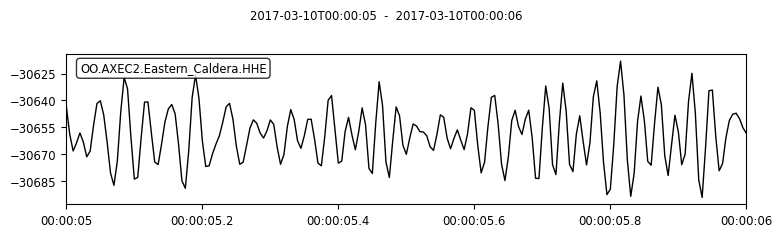

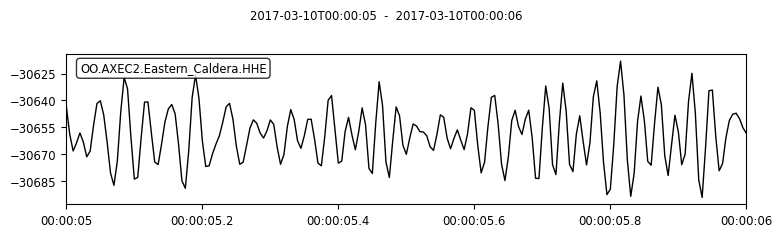

In [104]:
print(hydrophone_data_lf.stats)
hydrophone_data_lf.plot()

In [2]:
# test case if no data is available for entire day (directory doesn't exist)
start_time = datetime.datetime(2019,11,1,0,0,0)
end_time = datetime.datetime(2019,11,1,0,5,0)
node = 'LJ01D'

print('Getting Hydrophone Data from OOI: \n')
hydrophone_data = hydrophone_request.get_acoustic_data(start_time, end_time, node, verbose=True)
print('no data available: ', hydrophone_data is None)

Getting Hydrophone Data from OOI: 

Fetching URLs...
Client resonse: No Data Available for Specified Time
Client resonse: No Data Available for Specified Time
No data available for specified day and node. Please change the day or use a different node
no data available:  True
